Top 10 similar users to user 1: [773, 868, 592, 880, 429, 276, 916, 222, 457, 8]
Expected rating for user 1 on item 508: 4.21


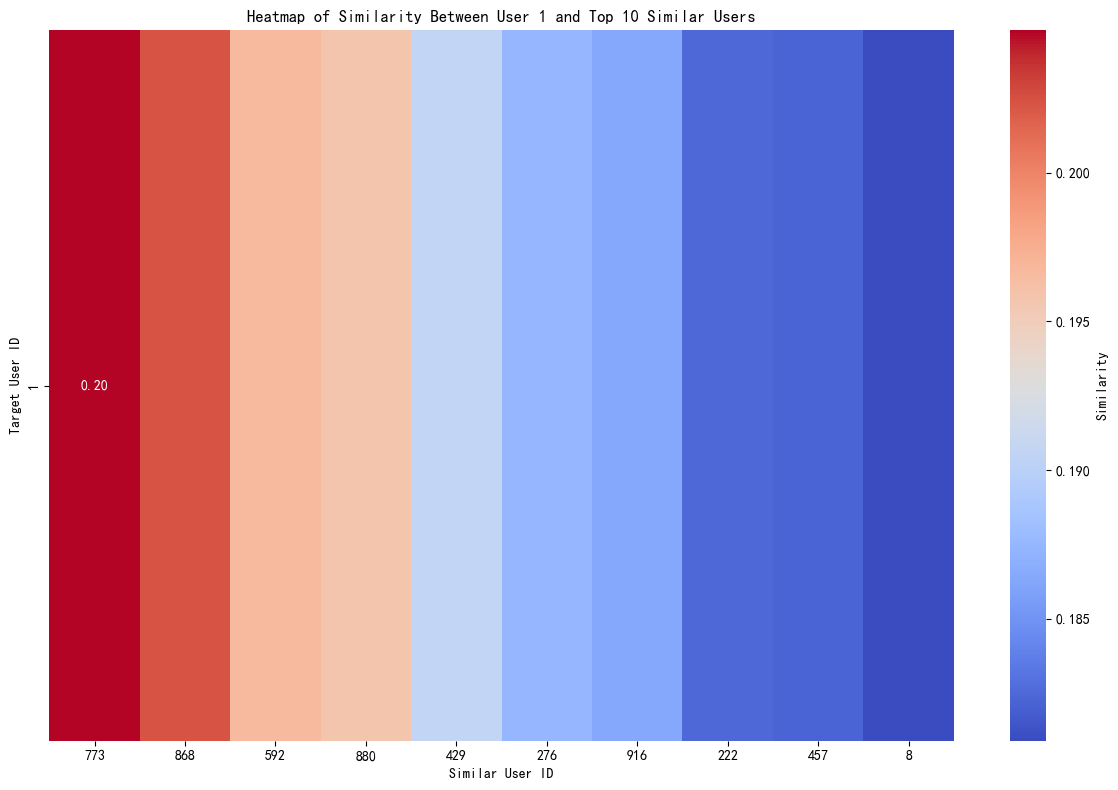

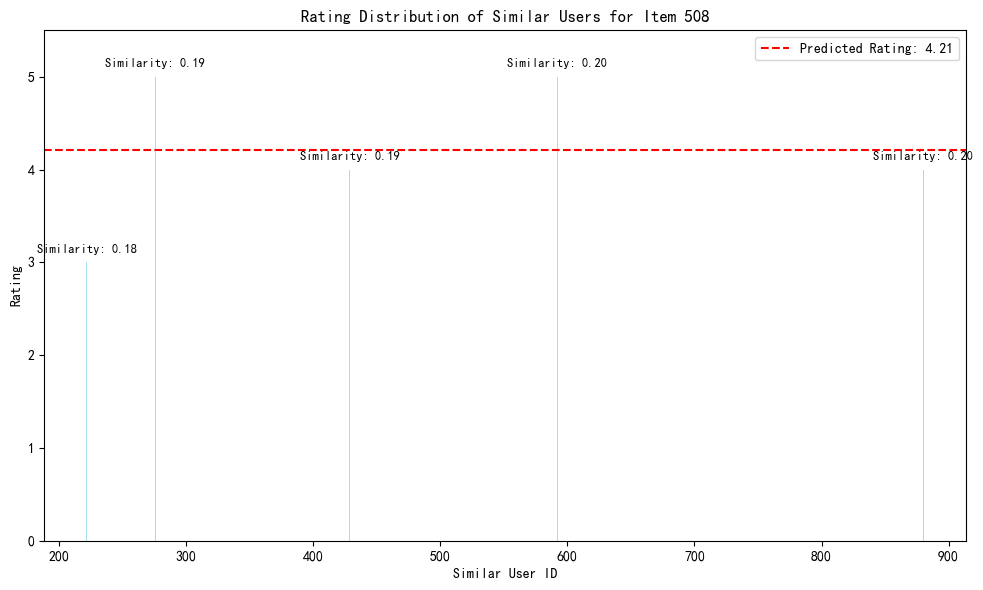

C:\Users\22970\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\22970\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


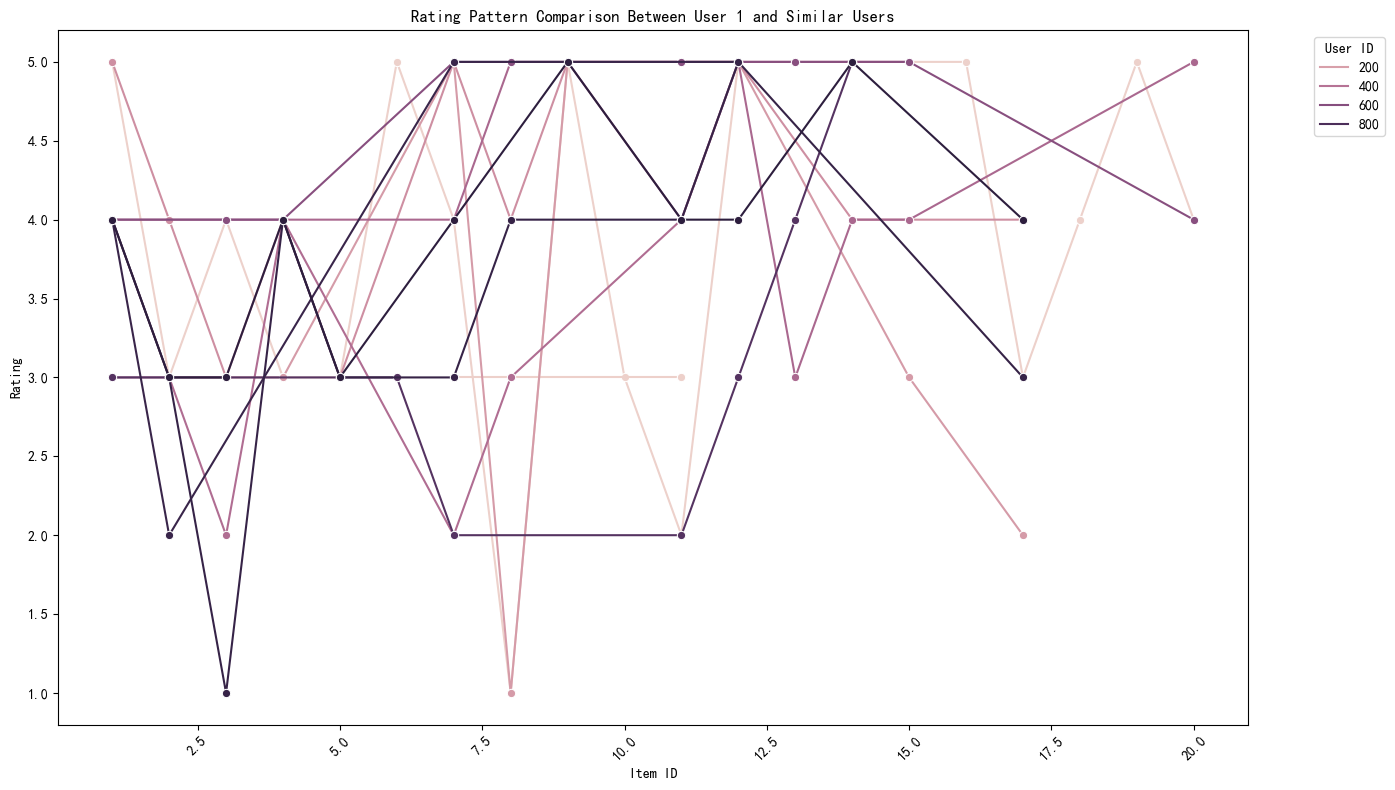

C:\Users\22970\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


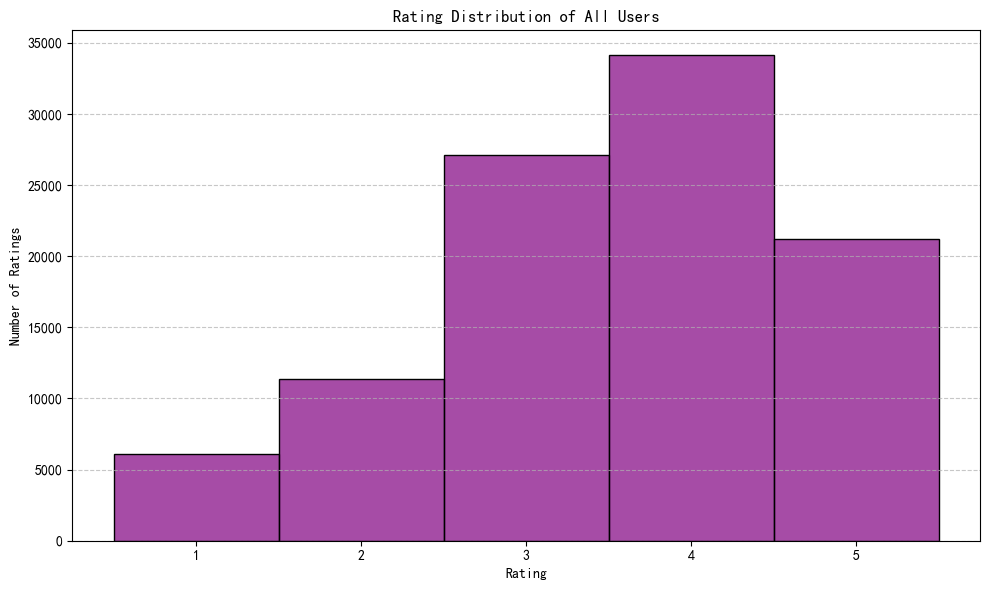

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import seaborn as sns
# Resolve Chinese font issues: specify a valid Chinese font (e.g., 'SimHei')
plt.rcParams["font.family"] = "SimHei"
plt.rcParams['axes.unicode_minus'] = False  # Resolve negative sign display issues
# Corrected file path (ensure it points to u.data)
data_path = r"C:\Users\22970\Downloads\ml-100k\ml-100k\u.data"
# Load data
columns = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_df = pd.read_csv(data_path, sep='\t', names=columns)  # Rename to ratings_df to avoid conflicts
# Create user-item utility matrix
utility_matrix = ratings_df.pivot_table(index='user_id', columns='item_id', values='rating')
# Center user ratings
user_means = utility_matrix.mean(axis=1)
centered_utility = utility_matrix.subtract(user_means, axis=0)
# Calculate cosine similarity
def cosine_similarity(user1, user2):
    user1 = user1.fillna(0)
    user2 = user2.fillna(0)
    return 1 - cosine(user1, user2)
# Get centered ratings for user 1
user1_centered = centered_utility.loc[1].fillna(0)
# Calculate similarity with other users
similarities = []
for user_id in utility_matrix.index:
    if user_id == 1:
        continue
    user_centered = centered_utility.loc[user_id].fillna(0)
    sim = cosine_similarity(user1_centered, user_centered)
    similarities.append((user_id, sim))
# Top 10 similar users
similar_users = sorted(similarities, key=lambda x: x[1], reverse=True)[:10]
print("Top 10 similar users to user 1:", [u[0] for u in similar_users])
# Predict rating for item 508
item_id = 508
similar_user_ratings = []
for user_id, sim in similar_users:
    rating = utility_matrix.loc[user_id, item_id]
    if not np.isnan(rating):
        similar_user_ratings.append((rating, sim))

# Calculate weighted average (fixed variable name conflict)
if similar_user_ratings:
    # Rename to ratings_list to avoid conflict with ratings_df
    ratings_list, sims_list = zip(*similar_user_ratings)
    weighted_avg = np.average(ratings_list, weights=sims_list)
else:
    weighted_avg = utility_matrix.stack().mean()

print(f"Expected rating for user 1 on item {item_id}: {weighted_avg:.2f}")
# 1. User similarity heatmap
plt.figure(figsize=(12, 8))
top_similar_users = [u[0] for u in similar_users]
similarity_matrix = pd.DataFrame(index=[1], columns=top_similar_users)
for user_id, sim in similar_users:
    similarity_matrix.loc[1, user_id] = sim
similarity_matrix = similarity_matrix.astype(float)
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Similarity'})
plt.title(f'Heatmap of Similarity Between User 1 and Top 10 Similar Users')
plt.xlabel('Similar User ID')
plt.ylabel('Target User ID')
plt.tight_layout()
plt.savefig('user_similarity_heatmap.png', dpi=300)
plt.show()
if similar_user_ratings:
    plt.figure(figsize=(10, 6))
    ratings_list, sims_list = zip(*similar_user_ratings)
    user_ids = [u[0] for u in similar_users if not np.isnan(utility_matrix.loc[u[0], item_id])]
    
    plt.bar(user_ids, ratings_list, color='skyblue', alpha=0.7)
    for i, (rating, sim) in enumerate(zip(ratings_list, sims_list)):
        plt.text(user_ids[i], rating + 0.1, f'Similarity: {sim:.2f}', ha='center', fontsize=9)
    plt.axhline(y=weighted_avg, color='r', linestyle='--', label=f'Predicted Rating: {weighted_avg:.2f}')
    plt.xlabel('Similar User ID')
    plt.ylabel('Rating')
    plt.title(f'Rating Distribution of Similar Users for Item {item_id}')
    plt.ylim(0, 5.5)
    plt.legend()
    plt.tight_layout()
    plt.savefig('rating_distribution.png', dpi=300)
    plt.show()
else:
    print("No rating records from similar users for item 508, cannot generate rating distribution plot")
plt.figure(figsize=(14, 8))
common_items = utility_matrix.columns[~utility_matrix.loc[[1] + top_similar_users].isna().all()]
if len(common_items) > 20:
    common_items = common_items[:20]
comparison_df = utility_matrix.loc[[1] + top_similar_users, common_items].reset_index().melt(
    id_vars='user_id', var_name='item_id', value_name='rating')
sns.lineplot(data=comparison_df, x='item_id', y='rating', hue='user_id', marker='o')
plt.xticks(rotation=45)
plt.title('Rating Pattern Comparison Between User 1 and Similar Users')
plt.xlabel('Item ID')
plt.ylabel('Rating')
plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('rating_pattern_comparison.png', dpi=300)
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=[1, 2, 3, 4, 5, 6], kde=False, color='purple', alpha=0.7)  # Use ratings_df
plt.xticks([1.5, 2.5, 3.5, 4.5, 5.5], ['1', '2', '3', '4', '5'])
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Rating Distribution of All Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('rating_histogram.png', dpi=300)
plt.show()